# Autoencoders

[Source](https://twitter.com/rickwierenga/status/1216801014004797446)

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import tensorflow as tf

In [0]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

# Simple auto encoder

In [0]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])

In [0]:
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[30]),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

In [0]:
stacked_autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [0]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [9]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                                  validation_data=[x_test, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1448 - val_loss: 0.1079
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1042 - val_loss: 0.0989
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0988 - val_loss: 0.0960
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0960 - val_loss: 0.0933
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0936 - val_loss: 0.0922
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0921 - val_loss: 0.0908
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0911 - val_loss: 0.0897
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0903 - val_loss: 0.0888
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0896 - val_

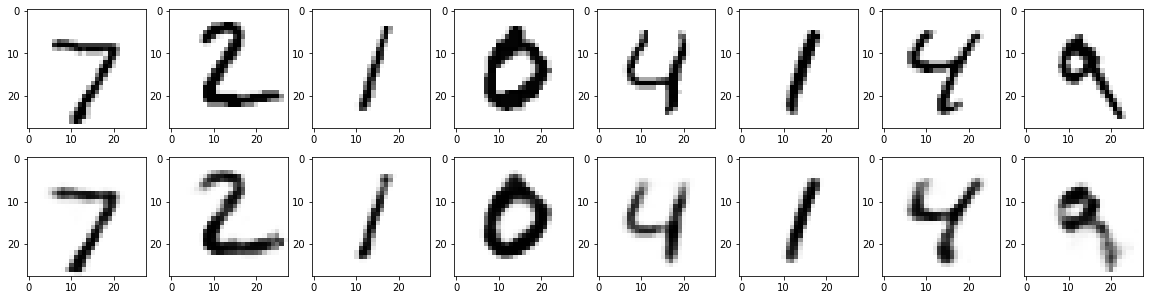

In [10]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

## Convolutional auto encoder

In [0]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2)
])

In [0]:
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid",
                                    activation="relu",
                                    input_shape=[3, 3, 64]),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                    activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

In [0]:
stacked_autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [0]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

In [15]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                         validation_data=[x_test, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1179 - val_loss: 0.0835
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0805 - val_loss: 0.0774
Epoch 3/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0764 - val_loss: 0.0742
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0742 - val_loss: 0.0724
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0728 - val_loss: 0.0717
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0718 - val_loss: 0.0708
Epoch 7/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0711 - val_loss: 0.0704
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0706 - val_loss: 0.0700
Epoch 9/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.07

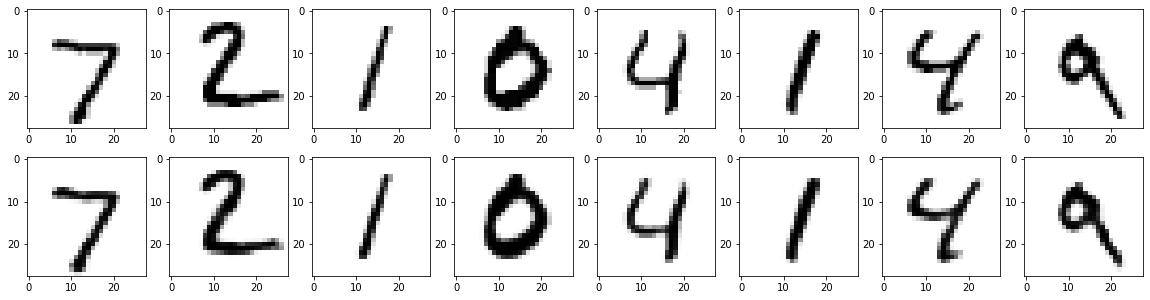

In [16]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

## Denoising auto encoder

In [0]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])

In [0]:
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[30]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

In [0]:
stacked_autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [0]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

In [0]:
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)

In [22]:
history = stacked_autoencoder.fit(x_train_noise, x_train, epochs=10,
                                  validation_data=[x_test_noise, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1631 - val_loss: 0.1248
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1194 - val_loss: 0.1121
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1100 - val_loss: 0.1052
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1051 - val_loss: 0.1020
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1018 - val_loss: 0.0995
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0996 - val_loss: 0.0971
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0982 - val_loss: 0.0964
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0973 - val_loss: 0.0955
Epoch 9/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0965 - val_

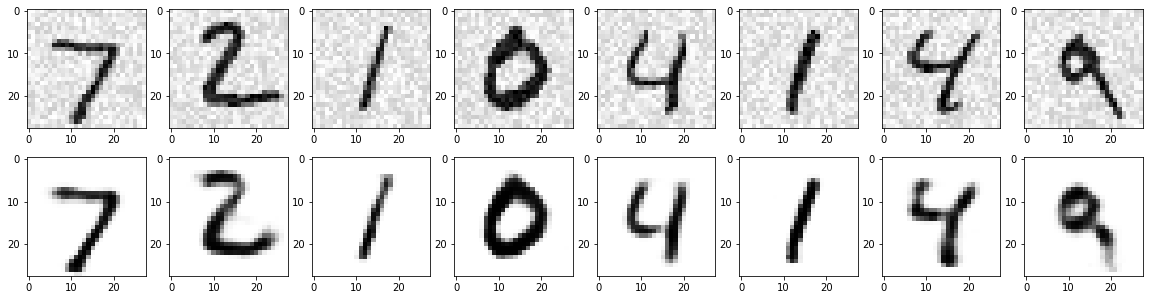

In [23]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  imshow(x_test_noise[i], cmap="binary")

  subplot(2, 8, i+8+1)
  pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
  imshow(pred.reshape((28, 28)), cmap="binary")